# ========================================
# MÓDULO 1: Configuración inicial y generación de datos
# ========================================


In [16]:
# Librerías necesarias para trabajar con archivos, datos y fechas
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


# ========================================
# MÓDULO 2: Preparación del dataset para modelado
# ========================================

In [19]:
# Leemos el archivo CSV con los datos de temperatura diaria
dataset_path = 'dataset_temperatura.csv'
print(data.head())  # Mostramos las primeras filas para verificar estructura

        date  temperature
0 2023-01-01    23.232203
1 2023-01-02    25.727840
2 2023-01-03    24.041451
3 2023-01-04    23.173248
4 2023-01-05    21.354822


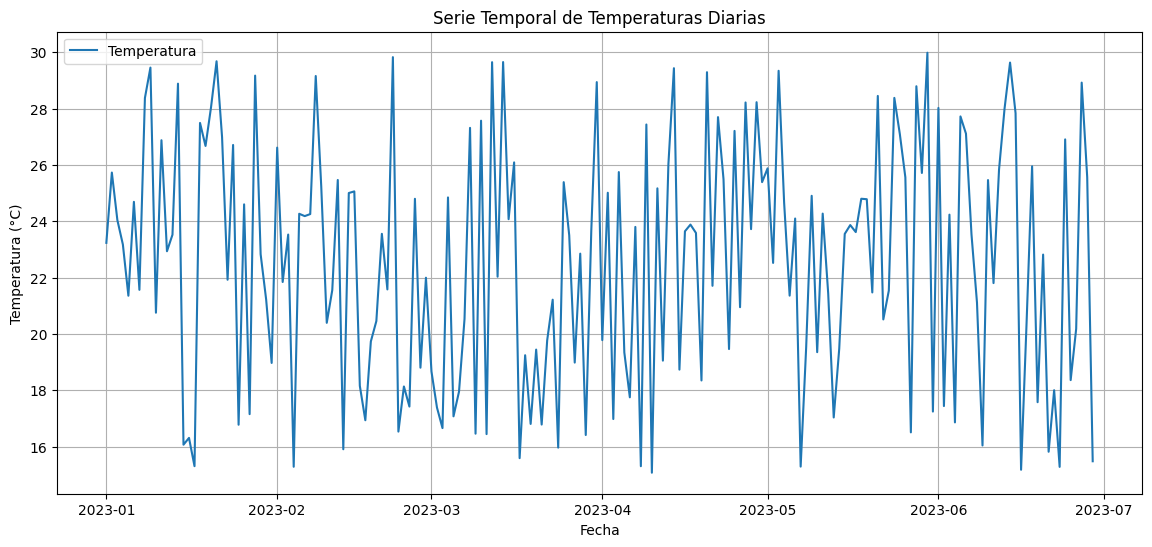

In [20]:
# Visualizamos la serie temporal original para comprender la tendencia general
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data['date'], data['temperature'], label='Temperatura')
plt.title('Serie Temporal de Temperaturas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()

In [21]:

# ========================================
# MÓDULO 3: Normalización y preparación de secuencias para LSTM
# ========================================


In [22]:
# Normalizamos los datos para que estén en el rango [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
temperatures = data['temperature'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(temperatures)

In [23]:
# Función para crear secuencias de entrada/salida
# Por ejemplo, si seq_length = 30, el modelo verá 30 días para predecir el siguiente
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

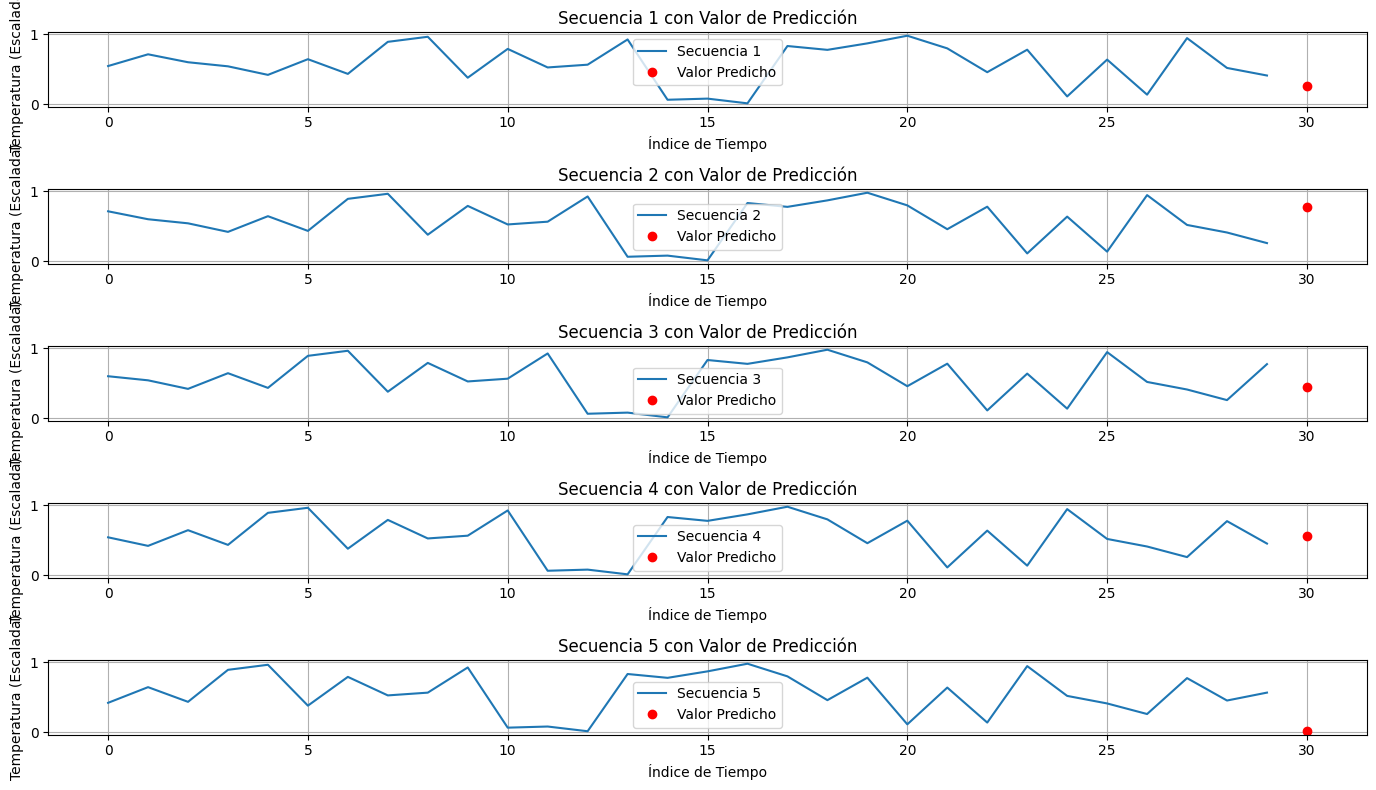

In [24]:
# Visualizamos algunas secuencias generadas para verificar la estructura
num_sequences = 5
plt.figure(figsize=(14, 8))
for i in range(num_sequences):
    plt.subplot(num_sequences, 1, i+1)
    plt.plot(X[i], label=f'Secuencia {i+1}')
    plt.plot(seq_length, y[i], 'ro', label='Valor Predicho')
    plt.title(f'Secuencia {i+1} con Valor de Predicción')
    plt.xlabel('Índice de Tiempo')
    plt.ylabel('Temperatura (Escalada)')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

# ========================================
# MÓDULO 4: Construcción del modelo LSTM
# ========================================


In [25]:
# Importamos las capas necesarias para construir una red LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [26]:
# Creamos el modelo secuencial LSTM
model = Sequential()
model.add(Input(shape=(seq_length, 1)))  # Definimos la forma de entrada explícitamente
model.add(LSTM(50, return_sequences=True))  # Primera capa LSTM (retorna secuencia para encadenar otra LSTM)
model.add(LSTM(50))  # Segunda capa LSTM
model.add(Dense(1))  # Capa de salida: regresión (una sola temperatura)
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Dividimos los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Confirmamos las dimensiones de los datos
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_test: {y_test.shape}')


Tamaño de X_train: (120, 30, 1)
Tamaño de y_train: (120, 1)
Tamaño de X_test: (30, 30, 1)
Tamaño de y_test: (30, 1)


# ========================================
# MÓDULO 5: Entrenamiento del modelo
# ========================================

In [29]:

# Entrenamos el modelo y guardamos el historial para análisis posterior
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - loss: 0.3123 - val_loss: 0.1407
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1497 - val_loss: 0.0912
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1018 - val_loss: 0.0929
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0830 - val_loss: 0.0798
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0866 - val_loss: 0.0820
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0916 - val_loss: 0.0809
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0889 - val_loss: 0.0798
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0854 - val_loss: 0.0838
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0922 - val_loss: 0.0817
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0816 - val_loss: 0.0796
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0892 - val_loss: 0.0795
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0817 - val_loss: 0.0794


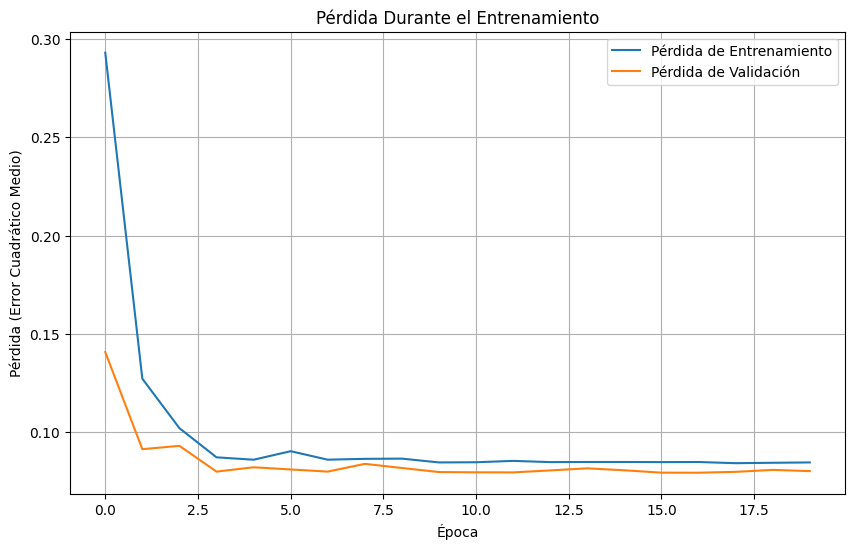

In [30]:
# Visualizamos la pérdida de entrenamiento y validación durante las épocas
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida Durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (Error Cuadrático Medio)')
plt.legend()
plt.grid(True)
plt.show()

# ========================================
# MÓDULO 6: Evaluación del modelo
# ========================================

In [31]:

# Generamos predicciones sobre el conjunto de prueba
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


In [32]:
# Reescalamos los valores predichos a la escala original de temperaturas
predictions = scaler.inverse_transform(predictions)

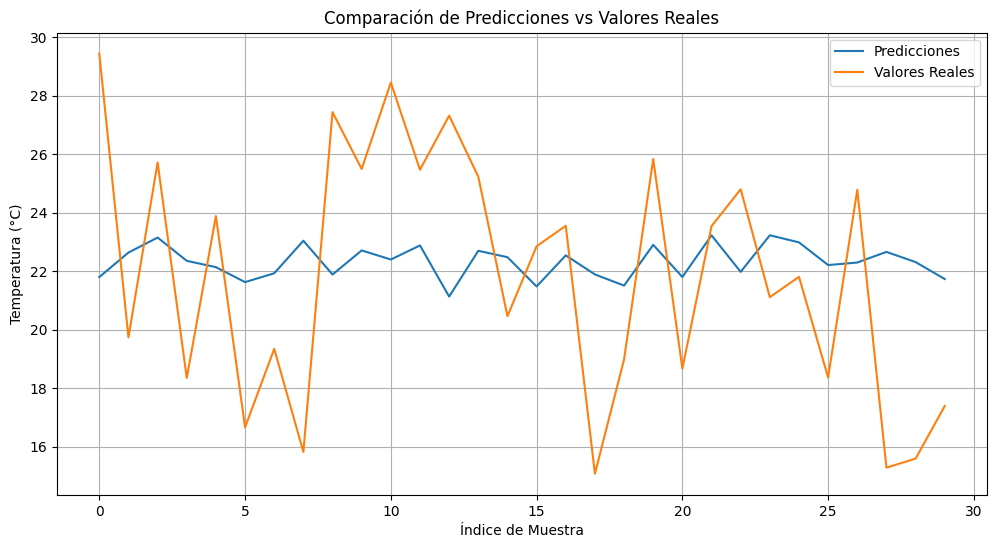

In [33]:
# Mostramos algunas predicciones versus valores reales
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicciones')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Valores Reales')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.xlabel('Índice de Muestra')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()